In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#read raw data
data=pd.read_csv('Ruppert Dataset/CreditCard.csv')

In [3]:
data_clean=data[data.age>18]

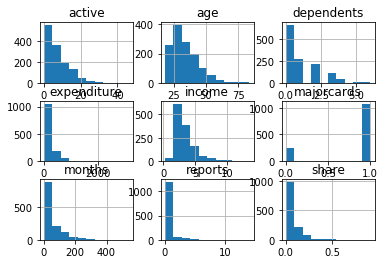

In [4]:
%matplotlib inline
data_clean.hist();


In [5]:
data_clean['report']=np.log(data_clean.reports+1)
data_clean['logshare']=np.log(data_clean.share)
data_clean['owner1']=data_clean['owner'].apply(lambda x:1 if x=='yes' else 0)
data_clean['card1']=data_clean['card'].apply(lambda x:1 if x=='yes' else 0)
new_data=data_clean[['card1','report','income','logshare','age','owner1','dependents','months']].astype(float)
new_data['cons']=1

/Users/Russell/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Russell/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Russell/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [6]:
logit_model = sm.GLM(new_data['card1'], new_data[['cons','report','income','logshare','age','owner1','dependents','months']],\
                     family=sm.families.Binomial())

In [7]:
result=logit_model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  card1   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1304
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -69.895
Date:                Fri, 28 Apr 2017   Deviance:                       139.79
Time:                        16:05:44   Pearson chi2:                     247.
No. Iterations:                    13                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
cons          21.4739      3.674      5.844      0.000        14.272    28.675
report        -2.9086      1.098     -2.650      0.008        -5.060    -0.757
income         0.9033      0.190      4.760      0.000         0.531     1.275
logshare       3.4230      0.530      6.452      0.000         2.383     4.463
age            0.0227      0.022      1.036      0.300        -0.020     0.066
owner1         0.7052      0.533      1.323      0.186        -0.340     1.750
dependents    -0.6649      0.267     -2.487      0.013        -1.189    -0.141
months        -0.0057      0.004     -1.435      0.151        -0.014     0.002
==============================================================================
"""

In [22]:
import itertools
#Algorithm Equivalent of stepAIC

#Desired Variables
predictorcols=['cons','report','income','logshare','age','owner1','dependents','months']

train=new_data

AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = list(variables)
        i = True
        independent =''
        for p in predictors:
            if i:
                independent = p
                i=False
            else:
                independent+='+ {}'.format(p)
        #regresion = '$card1$ ~ {}'.format(independent)
        #res = sm.ols(regresion, data=train).fit()
        res=sm.GLM(train['card1'],train[predictors],family=sm.families.Binomial()).fit()
        AICs[variables] = 2*(k+1) - 2*res.llf

print(min(AICs, key=AICs.get))
    



('cons', 'report', 'income', 'logshare', 'dependents')


In [3]:
Irates=pd.read_csv('Ruppert Dataset/Irates.csv')

In [4]:
Irates.head()

,r1,r2,r3,r5,r6,r11,r12,r36,r60,r120
0,0.325,0.422,0.477,0.549,0.577,0.698,0.720,1.145,1.415,1.825
1,0.322,0.427,0.485,0.555,0.583,0.698,0.718,1.119,1.386,1.824
2,0.326,0.419,0.473,0.543,0.571,0.693,0.715,1.140,1.406,1.817
3,0.318,0.441,0.508,0.583,0.610,0.718,0.737,1.105,1.364,1.804
4,0.302,0.445,0.521,0.606,0.637,0.759,0.780,1.172,1.416,1.815


In [5]:
Irates['lag_r1']=Irates.r1.shift()
Irates['diff_r1']=Irates.r1.diff()

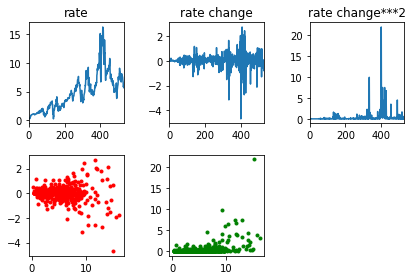

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(231)
Irates.r1.plot(title='rate');

plt.subplot(232)
Irates.diff_r1.plot(title='rate change');

plt.subplot(233)
(Irates.diff_r1**2).plot(title='rate change***2');

plt.subplot(234);
plt.scatter(Irates.lag_r1,Irates.diff_r1,marker='.',color='r');

plt.subplot(235);
plt.scatter(Irates.lag_r1,Irates.diff_r1**2,marker='.',color='g');

plt.tight_layout()

In [7]:
def fun(para,exog,enog):
    #para[0]:theta
    #para[1]:a
    return enog-para[1]*(para[0]-exog)

In [8]:
from scipy.optimize import leastsq
data=Irates.dropna()

kd,cov,infodict,mesg,ier = leastsq(fun,[5,0.01],args=(data['lag_r1'],data['diff_r1']),full_output=True)

print(kd)

[ 5.32754118  0.01983913]


In [9]:
cov

array([[  4.91559294e+00,  -4.74757244e-03],
       [ -4.74757244e-03,   1.85044747e-04]])

In [10]:
prediction=(kd[0]-data['lag_r1'])*kd[1]
residual=data['diff_r1']-prediction
res_sq=residual**2

In [26]:
def target(para,exo,endo):
    #para[0]: A
    #para[1]: B
    return endo-para[0]*exo**para[1]

param,cov,infodict,mesg,ier = leastsq(target,[0.2,0.5],args=(data['lag_r1'],residual),full_output=True)

In [28]:
param

array([ 0.00178686,  0.49449803])

In [29]:
cov

array([[  4.04699525e-03,  -1.14401299e+00],
       [ -1.14401299e+00,   3.59170239e+02]])

In [30]:
def target(para,exo,endo):
    #para[0]: A
    #para[1]: B
    return endo-para[0]*exo**para[1]

param,cov,infodict,mesg,ier = leastsq(target,[0.1,0.5],args=(data['lag_r1'],res_sq),full_output=True)

print(np.sqrt(param[0]))
print(param[1]/2)

0.036052409463
1.48661172979


In [31]:
cov

array([[  5.88269134e-07,  -1.77235058e-04],
       [ -1.77235058e-04,   5.39000660e-02]])

In [50]:
#calculate fitted residual numbers
#fitted_res=param[0]*data['lag_r1']**param[1]

fitted_res=0.0013*data['lag_r1']**2.9732


weighting_scheme=1/fitted_res


CKLS,cov,infodict,mesg,ier = leastsq(fun,[5,0.01],args=(data['lag_r1'],data['diff_r1']),full_output=True,diag=weighting_scheme)


In [53]:
CKLS

array([ 5.32754118,  0.01983913])

In [54]:
cov

array([[  4.91559294e+00,  -4.74757244e-03],
       [ -4.74757244e-03,   1.85044747e-04]])

In [2]:
HousePrices=pd.read_csv('Ruppert Dataset/HousePrices.csv')

In [3]:
HousePrices.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
X=HousePrices[['lotsize','bedrooms','bathrooms','stories','driveway','recreation','fullbase','gasheat','aircon','garage','prefer']]
Y=HousePrices['price']

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).